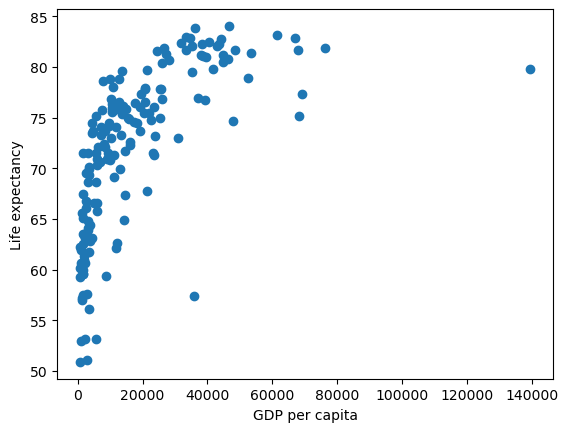

,Entity,Code,Year,GDP per capita,Life expectancy
1,Albania,ALB,2015,10947,78.025
2,Algeria,DZA,2015,13024,76.090
4,Argentina,ARG,2015,19316,76.068
11,Barbados,BRB,2015,10030,78.801
16,Bosnia and Herzegovina,BIH,2015,10305,76.865
28,Chile,CHL,2015,21340,79.646
30,Colombia,COL,2015,12858,76.531
33,Costa Rica,CRI,2015,13568,79.565
35,Croatia,HRV,2015,20905,77.892
36,Cuba,CUB,2015,7889,78.561


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gdp = pd.read_csv("./datasets/GDP-2015.csv")
le = pd.read_csv("./datasets/life-expectancy.csv")

le = le[le["Year"] == 2015]
le = le.drop(columns = ["Code", "Year"]) # Remove duplicate colums

gdple = gdp.merge(le, left_on="Entity", right_on="Entity") # Merge life expectancy and GDP

world_index = gdple["Entity"].tolist().index("World")
gdple.drop([world_index, world_index+1]) # Remove the totaled world data

x = np.array(gdple["GDP per capita"])
y = np.array(gdple["Life expectancy"])

plt.scatter(x,y)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")
plt.show()

lestd = np.std(gdple["Life expectancy"]) # Compute standard diveation
lemean = np.mean(gdple["Life expectancy"]) # Compute mean







In [21]:
tmp = gdple[gdple["Life expectancy"] >= lemean + lestd] 
display(tmp) # Countries that have life expectancy higher than one standard deviation above the mean

,Entity,Code,Year,GDP per capita,Life expectancy
6,Australia,AUS,2015,44336,82.794
7,Austria,AUT,2015,44845,81.182
13,Belgium,BEL,2015,39531,80.969
24,Canada,CAN,2015,42844,82.026
37,Cyprus,CYP,2015,25903,80.350
39,Denmark,DNK,2015,44939,80.475
49,Finland,FIN,2015,37920,81.196
50,France,FRA,2015,38448,82.224
54,Germany,DEU,2015,46426,80.770
56,Greece,GRC,2015,24545,81.548


In [27]:
tmp = gdple[gdple["Life expectancy"] >= lemean + lestd/2]
tmp = tmp[tmp["GDP per capita"] <= 35000]
display(tmp)# Countries that have high life expectancy but have low GDP

,Entity,Code,Year,GDP per capita,Life expectancy
1,Albania,ALB,2015,10947,78.025
2,Algeria,DZA,2015,13024,76.090
11,Barbados,BRB,2015,10030,78.801
16,Bosnia and Herzegovina,BIH,2015,10305,76.865
30,Colombia,COL,2015,12858,76.531
33,Costa Rica,CRI,2015,13568,79.565
36,Cuba,CUB,2015,7889,78.561
43,Ecuador,ECU,2015,10914,76.143
81,Lebanon,LBN,2015,12665,78.768
97,Montenegro,MNE,2015,17738,76.452


In [28]:
#f. Does every strong economy (normally indicated by GDP) have high life expectancy?
gdpmean = np.mean(gdple["GDP per capita"]) # Compute mean

tmp = gdple[gdple["Life expectancy"] <= lemean]
tmp = tmp[tmp["GDP per capita"] >= gdpmean]
display(tmp)# Countries that have high life expectancy but have low GDP

,Entity,Code,Year,GDP per capita,Life expectancy
46,Equatorial Guinea,GNQ,2015,35743,57.359
75,Kazakhstan,KAZ,2015,23408,71.319
122,Russia,RUS,2015,23118,71.464
150,Turkmenistan,TKM,2015,21262,67.704


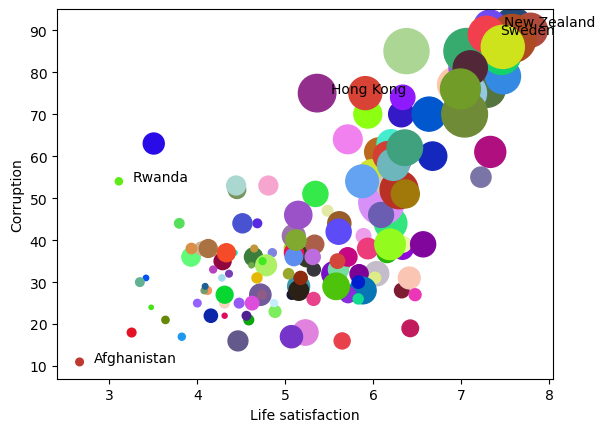

,Entity,Code,Year,Corruption,Life satisfaction,GDP per capita
93,New Zealand,NZL,2015,91,7.327183,33445
33,Denmark,DNK,2015,91,7.593702,44939
40,Finland,FIN,2015,90,7.788252,37920
119,Sweden,SWE,2015,89,7.286805,43464
97,Norway,NOR,2015,88,7.578745,76305
120,Switzerland,CHE,2015,86,7.473593,61476
112,Singapore,SGP,2015,85,6.378438,67110
76,Luxembourg,LUX,2015,85,7.061381,67804
92,Netherlands,NLD,2015,84,7.458965,48463
21,Canada,CAN,2015,83,7.414868,42844


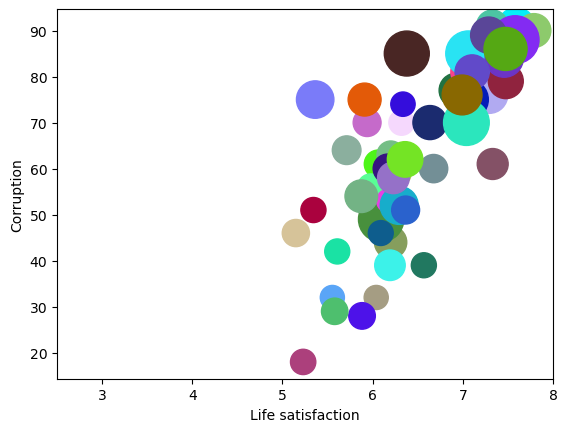

In [3]:
# --------- Corruption vs Life satisfaction ---------

cor = pd.read_csv("./datasets/TI-corruption-perception-index.csv")
hap = pd.read_csv("./datasets/happiness-cantril-ladder.csv")

cor = cor[cor["Year"] == 2015]
hap = hap[hap["Year"] == 2015]
hap = hap.drop(columns = ["Code", "Year"]) # Remove duplicate colums

cor = cor.merge(hap, left_on="Entity", right_on="Entity")
tmp = gdp.drop(columns = ["Code", "Year"])
cor = cor.merge(tmp, left_on="Entity", right_on="Entity") # add gdp to the table

xs = np.array(cor["Life satisfaction"])
ys = np.array(cor["Corruption"])
c = np.array(cor["Entity"])
gdps = np.array(cor["GDP per capita"])

plt.scatter(xs,ys, s=(gdps/64), c=np.random.rand(len(xs),3))
plt.xlabel("Life satisfaction")
plt.ylabel("Corruption")

#for x,y,z in zip(xs,ys, c): # Print all countries names next to the point
#    label = f"{z}"
#    plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,0), ha='left') 

plt.annotate("New Zealand", (7.327183,91), textcoords="offset points", xytext=(10,0), ha='left')
plt.annotate("Sweden", (7.286805, 89), textcoords="offset points", xytext=(10,0), ha='left')
plt.annotate("Afghanistan", (2.661718, 11), textcoords="offset points", xytext=(10,0), ha='left')
plt.annotate("Hong Kong", (5.36247491836548,75), textcoords="offset points", xytext=(10,0), ha='left')
plt.annotate("Rwanda", (3.10837388038635,54), textcoords="offset points", xytext=(10,0), ha='left')
plt.show()

corstd = np.std(cor["Corruption"]) # Compoute standard diveation
cormean = np.mean(cor["Corruption"]) # Compoute mean

tmp = cor[cor["Corruption"] >= cormean + corstd] 
tmp = tmp.sort_values(by=["Corruption"], ascending=False)
display(tmp) # least corrupt countries sorted by corruption


gdpstd = np.std(gdp["GDP per capita"]) # Compoute standard diveation
gdpmean = np.mean(gdp["GDP per capita"]) # Compoute mean

tmp = cor[cor["GDP per capita"] >= gdpmean] 
xs = np.array(tmp["Life satisfaction"])
ys = np.array(tmp["Corruption"])
gdps = np.array(tmp["GDP per capita"])
plt.scatter(xs,ys, s=(gdps/64), c=np.random.rand(len(xs),3)) # Plot all countries with GDP higer than the mean
plt.xlim(2.5, 8)
plt.xlabel("Life satisfaction")
plt.ylabel("Corruption")
plt.show()

# --------- Vaccination vs Covid Deaths ---------

vac = pd.read_csv("./datasets/global-vaccination-coverage.csv")
cov = pd.read_csv("./datasets/owid-covid-data.csv")


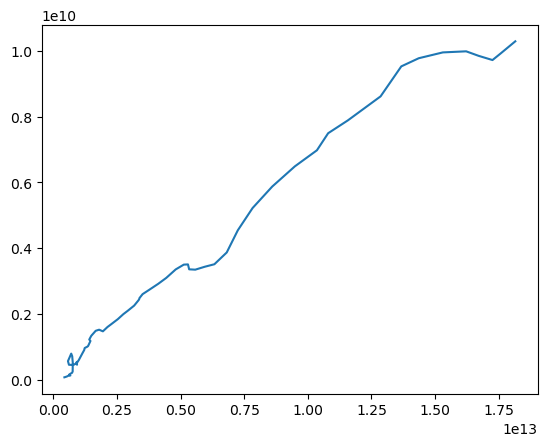

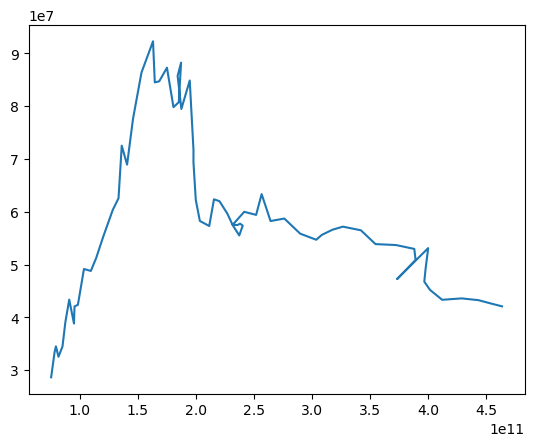

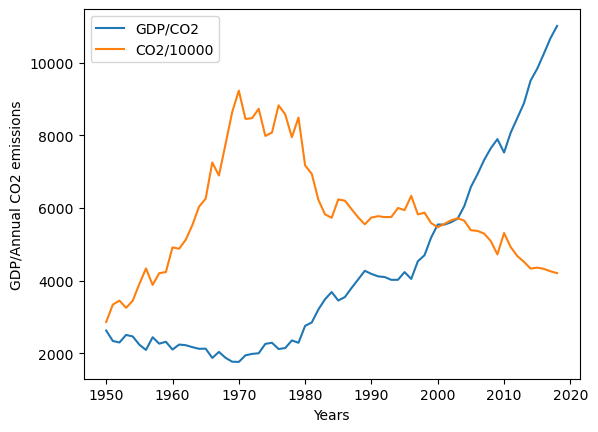

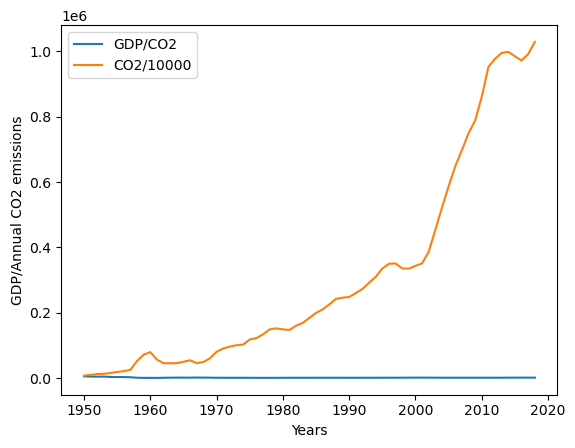

In [29]:
# --------- GDP vs CO2 ---------

# gdp charts for both china and Sweden
gdp = pd.read_csv('./datasets/gdp-world-regions-stacked-area.csv')
gdp.drop(columns = ["417484-annotations"], inplace=True)
gdp_filt_swe = (gdp['Entity'] == 'Sweden') & (gdp['Year'] >= 1950)
gdp_filt_ch = (gdp['Entity'] == 'China') & (gdp['Year'] >= 1950)
gdp_swe = gdp[gdp_filt_swe]
gdp_ch = gdp[gdp_filt_ch]


# co2 charts for both china and Sweden
co2 = pd.read_csv('./datasets/annual-co2-emissions-per-country.csv')


co2_filt_swe = (co2['Entity'] == 'Sweden') & (co2['Year'] >= 1950)
co2_filt_ch = (co2['Entity'] == 'China') & (co2['Year'] >= 1950)
co2_swe = co2[co2_filt_swe]
co2_ch = co2[co2_filt_ch]

co2_swe = co2_swe.drop(columns = ["Entity", "Code"])
co2_ch = co2_ch.drop(columns = ["Entity", "Code"])



comb_swe = pd.merge(co2_swe, gdp_swe, on='Year')
comb_ch = pd.merge(co2_ch, gdp_ch, on='Year')

xpoints = comb_ch['GDP'].to_list()
ypoints = comb_ch['Annual CO2 emissions'].to_list()
plt.plot(xpoints,ypoints)
plt.show()
xpoints = comb_swe['GDP'].to_list()
ypoints = comb_swe['Annual CO2 emissions'].to_list()
plt.plot(xpoints, ypoints)
plt.show()

#xpoints = comb_swe['GDP'].to_list()
#ypoints = comb_swe['Annual CO2 emissions'].to_list()
xpoints = []
for i in range(len(comb_swe['Year'].to_list())):
    xpoints.append(comb_swe.iloc[i]["GDP"] / comb_swe.iloc[i]["Annual CO2 emissions"])

plt.plot(comb_swe['Year'], xpoints)
plt.ylabel("GDP/Annual CO2 emissions")
plt.xlabel("Years")

an_co2_div = []
for i in range(len(comb_swe['Year'].to_list())):
    an_co2_div.append(comb_swe.iloc[i]["Annual CO2 emissions"] / 10000)
plt.plot(comb_swe['Year'], an_co2_div)
plt.legend(["GDP/CO2", "CO2/10000"])
plt.show()

xpoints = []
for i in range(len(comb_ch['Year'].to_list())):
    xpoints.append(comb_ch.iloc[i]["GDP"] / comb_ch.iloc[i]["Annual CO2 emissions"])

plt.plot(comb_ch['Year'], xpoints)
plt.ylabel("GDP/Annual CO2 emissions")
plt.xlabel("Years")

an_co2_div = []
for i in range(len(comb_ch['Year'].to_list())):
    an_co2_div.append(comb_ch.iloc[i]["Annual CO2 emissions"] / 10000)
plt.plot(comb_ch['Year'], an_co2_div)
plt.legend(["GDP/CO2", "CO2/10000"])
plt.show()

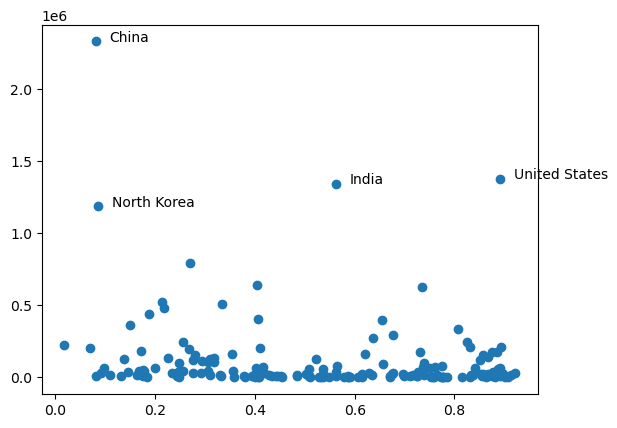

In [59]:
democracy = pd.read_csv('./datasets/democracy.csv')
military = pd.read_csv('./datasets/military-personnel.csv')
military.columns

#Index(['Entity', 'Code', 'Year', 'electdem_vdem_owid', 'electdem_vdem_high_owid', 'electdem_vdem_low_owid'],
#Index(['Entity', 'Code', 'Year', 'military_personnel']
democracy16 = democracy[democracy['Year'] == 2016]
military16 = military[military['Year'] == 2016]
democracy16 = democracy16.drop(columns = ['Code', 'Year', 'electdem_vdem_high_owid','electdem_vdem_low_owid' ])
military16 = pd.merge(democracy16,military16, on='Entity')

plt.scatter(military16['electdem_vdem_owid'], military16['military_personnel'])
for x,y,z in zip(military16['electdem_vdem_owid'].to_list(),military16['military_personnel'].to_list(), military16['Entity'].to_list()): # Print all countries names next to the point
    if z in ["China", "India", "North Korea", "United States"]:
        label = f"{z}"
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,0), ha='left')